In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [5]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

In [6]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [7]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [8]:
df.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'],
      dtype='object')

In [13]:
df.dtypes

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int32
dtype: object

In [20]:
numerical = ['seniority', 'time', 'age','expenses','income','assets','debt','amount','price']

In [14]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [16]:
categorical = ['home', 'marital', 'records','job']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [22]:
y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

In [24]:
from sklearn.feature_extraction import DictVectorizer

In [26]:
from sklearn.linear_model import LogisticRegression

In [67]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\lakec\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [68]:
X_train.shape

(2672, 29)

In [28]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
default_decision = (y_pred >= 0.5)
(y_val == default_decision).mean()

0.7519640852974186

In [29]:
len(y_val)

891

In [30]:
(y_val == default_decision).mean()

0.7519640852974186

In [31]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [32]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [33]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [34]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[588,  57],
       [164,  82]])

In [35]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.66, 0.06],
       [0.18, 0.09]])

In [36]:
from sklearn.metrics import roc_curve

In [37]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

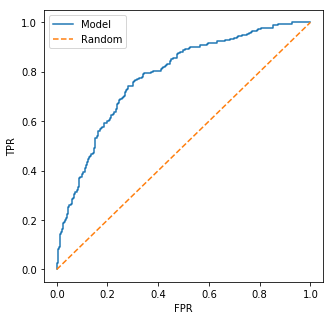

In [38]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [39]:
from sklearn.metrics import auc

In [40]:
auc(fpr, tpr)

0.7808344362513392

In [106]:
bnumerical = ['seniority']

In [107]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[bnumerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
val_dict = df_val[bnumerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
default_decision = (y_pred >= 0.5)
(y_val == default_decision).mean()

0.7239057239057239

In [109]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [110]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [111]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[645,   0],
       [246,   0]])

In [112]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

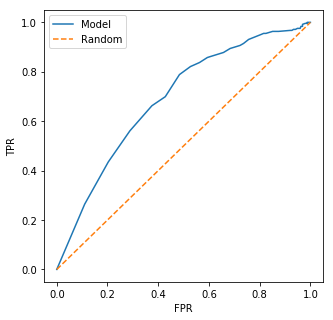

In [113]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [114]:
auc(fpr, tpr)

0.6903415894624062

In [115]:
numerical2 = ['seniority', 'income','assets']

In [116]:
categorical2 = ['home', 'records','job']

In [117]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical2 + numerical2].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [118]:
val_dict = df_val[categorical2 + numerical2].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
default_decision = (y_pred >= 0.5)
(y_val == default_decision).mean()

0.7800224466891134

In [119]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [120]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [121]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[581,  64],
       [132, 114]])

In [122]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

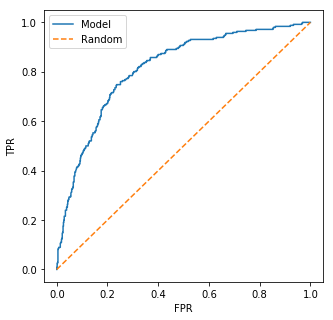

In [123]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [124]:
auc(fpr, tpr)

0.8120879813449298

In [125]:
#Precision and Recall

In [126]:
p = tp / (tp + fp)
p

0.6404494382022472

In [127]:
r = tp / (tp + fn)
r

0.4634146341463415

In [133]:
scores = []

thresholds = [0,0.1,0.2,0.3,0.4]

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    scores.append((t, tp, fp, fn, tn, p, r))

In [134]:
scores

[(0, 246, 645, 0, 0, 0.2760942760942761, 1.0),
 (0.1, 235, 445, 11, 200, 0.34558823529411764, 0.9552845528455285),
 (0.2, 215, 267, 31, 378, 0.4460580912863071, 0.8739837398373984),
 (0.3, 187, 162, 59, 483, 0.5358166189111748, 0.7601626016260162),
 (0.4, 140, 100, 106, 545, 0.5833333333333334, 0.5691056910569106)]

In [142]:
scores = []

thresholds = [0.09, 0.1, 0.11, 0.29, 0.3, 0.31, 0.49, 0.5, 0.51, 0.69, 0.7, 0.71]

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = 2 * p * r / (p+r)
    
    scores.append((t, tp, fp, fn, tn, p, r,f1))

In [143]:
scores

[(0.09,
  237,
  462,
  9,
  183,
  0.33905579399141633,
  0.9634146341463414,
  0.5015873015873017),
 (0.1,
  235,
  445,
  11,
  200,
  0.34558823529411764,
  0.9552845528455285,
  0.5075593952483801),
 (0.11,
  232,
  425,
  14,
  220,
  0.3531202435312024,
  0.943089430894309,
  0.5138427464008859),
 (0.29,
  189,
  173,
  57,
  472,
  0.5220994475138122,
  0.7682926829268293,
  0.6217105263157895),
 (0.3,
  187,
  162,
  59,
  483,
  0.5358166189111748,
  0.7601626016260162,
  0.6285714285714286),
 (0.31,
  184,
  156,
  62,
  489,
  0.5411764705882353,
  0.7479674796747967,
  0.6279863481228668),
 (0.49,
  115,
  65,
  131,
  580,
  0.6388888888888888,
  0.46747967479674796,
  0.5399061032863849),
 (0.5,
  114,
  64,
  132,
  581,
  0.6404494382022472,
  0.4634146341463415,
  0.5377358490566039),
 (0.51,
  110,
  60,
  136,
  585,
  0.6470588235294118,
  0.44715447154471544,
  0.5288461538461539),
 (0.69,
  48,
  18,
  198,
  627,
  0.7272727272727273,
  0.1951219512195122,
  0.3

In [144]:
from sklearn.model_selection import KFold

In [145]:
!pip install tqdm

In [146]:
from tqdm.auto import tqdm

In [148]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical2 + numerical2].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [149]:
def predict(df, dv, model):
    dicts = df[categorical2 + numerical2].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [151]:
y_pred = predict(df_val, dv, model)

In [152]:
from sklearn.metrics import roc_auc_score

In [153]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.001 0.765 +- 0.009
C=0.01 0.808 +- 0.012
C=0.1 0.813 +- 0.014
C=0.5 0.814 +- 0.015
C=1 0.814 +- 0.015
C=5 0.814 +- 0.015
C=10 0.814 +- 0.015



In [154]:
scores

[0.8255915255915256,
 0.8254374987585166,
 0.7892586687923474,
 0.8249125496207208,
 0.805535847735808]